In [2]:
# output like a,b,c,a,b,c...
from itertools import cycle 
import numpy as np
import matplotlib.pyplot as plt
# Compute Lasso path with coordinate descent （L1）
# Compute Lasso path with coordinate descent(L1 and L2)
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

In [3]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [4]:
X /= X.std(axis=0) #Standardize data （easier to set the l1_ratio parameter）

In [5]:
eps = 5e-3 # the smaller it is the longer is the path 

In [6]:
print("computing regularization path using the lasso...")
#Length of the path. eps=1e-3 means that alpha_min / alpha_max = 1e-3
alphas_lasso, coefs_lasso, _ =lasso_path(X, y, eps, fit_intercept=False)

computing regularization path using the lasso...


In [14]:
print("computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(X, y, eps=eps, positive=True, fit_intercept=False)

computing regularization path using the elastic net...


In [17]:
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(X, y, eps=eps, la_ratio=0.8, positive=True, fit_intercept=False)

Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


Line2D(_line18) Line2D(_line19)


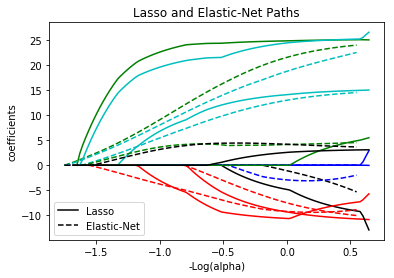

In [24]:
plt.figure(1)
# Get the current Axes instance on the current figure matching 
# the given keyword args, or create one.
ax = plt.gca()
colors=cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)
    
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

(-1.7698057217366594,
 0.76132727349371998,
 -14.945497919811665,
 29.786449873438126)

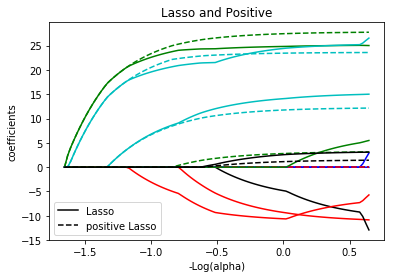

In [18]:
plt.figure(2)
ax = plt.gca()
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)
    
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Positive')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')

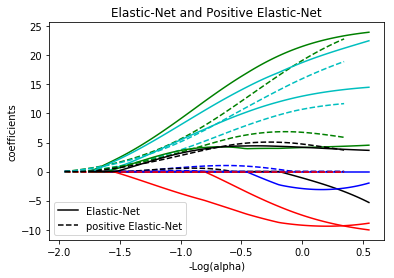

In [21]:
plt.figure(3)
ax = plt.gca()
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)
    
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and Positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'), loc='lower left')
plt.axis('tight')
plt.show()